<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Emergency-vs-Non-Emergency-Vehicle-Classification/blob/master/Emergency_vs_Non_Emergency_Vehicle_Classification_Using_Neural_Network_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading DataSet**

In [26]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip -uq "drive/My Drive/Dataset.zip"

In [4]:
# Reading the CSV File
data = pd.read_csv('Dataset/emergency_classification.csv')

In [5]:
# Create random number generator
seed = 42

In [6]:
rng = np.random.RandomState(seed)

In [7]:
# Looking the first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [8]:
# Distribution of classes in the dataset
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [9]:
# Load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
  # loading the image using its name
  img = plt.imread('Dataset/images/' + img_name)
  # saving each image in the list
  X.append(img)

# Converting the list of images into array
X = np.array(X)

# Storing the target variable in saperate variable
y = data.emergency_or_not.values
  

In [10]:
# shape of the image
X.shape, y.shape

((2352, 224, 224, 3), (2352,))

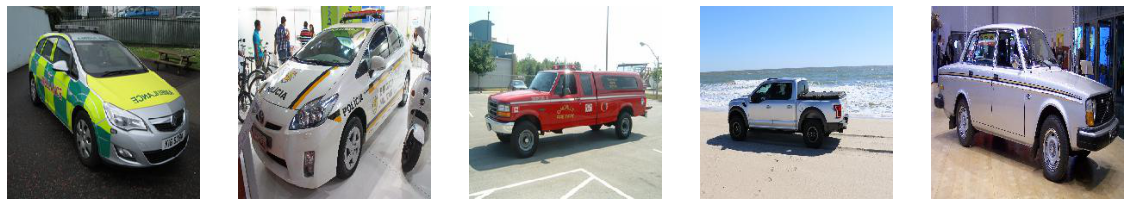

In [11]:
# Visualizing images
fig,ax = plt.subplots(nrows=1, ncols=5,figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')

# **Pre-Processing the data**

In [12]:
# Convert 3 dimensional images into 1 dimensional
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [13]:
# Minimum and maximum pixel value of images
X.min(), X.max()

(0, 255)

In [14]:
# Normalize the pixel values
X = X / X.max()

In [15]:
# minimum and maximum pixel value of images after normalize
X.min(), X.max()

(0.0, 1.0)

# **Creating tarining and validation set**

In [16]:
# Creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state= seed)

In [17]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

# **Defining the model architecture**



In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


# **Compiling the model**

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# **Training the Model**

In [ ]:
# Training the model
model_history = model.fit(X_train,y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 1s 77ms/step - loss: 0.8242 - accuracy: 0.5711 - val_loss: 0.7755 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 52ms/step - loss: 0.6580 - accuracy: 0.6100 - val_loss: 0.6303 - val_accuracy: 0.6501
Epoch 3/50
13/13 [==============================] - 1s 52ms/step - loss: 0.6156 - accuracy: 0.6701 - val_loss: 0.6026 - val_accuracy: 0.6771
Epoch 4/50
13/13 [==============================] - 1s 52ms/step - loss: 0.6337 - accuracy: 0.6501 - val_loss: 0.7401 - val_accuracy: 0.5156
Epoch 5/50
13/13 [==============================] - 1s 52ms/step - loss: 0.6056 - accuracy: 0.6744 - val_loss: 0.6131 - val_accuracy: 0.6700
Epoch 6/50
13/13 [==============================] - 1s 52ms/step - loss: 0.6050 - accuracy: 0.6738 - val_loss: 0.5869 - val_accuracy: 0.6771
Epoch 7/50
13/13 [==============================] - 1s 52ms/step - loss: 0.5942 - accuracy: 0.6962 - val_loss: 0.6106 - val_accuracy: 0.6615
Epoch 8/50
13

# **Evaluating model performance**

In [ ]:
# getting prediction as a form of class as well as probabilities
predictions = model.predict_classes(X_valid)[:,0]
prediction_probabilities = model.predict(X_valid)[:,0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.7308781869688386 %


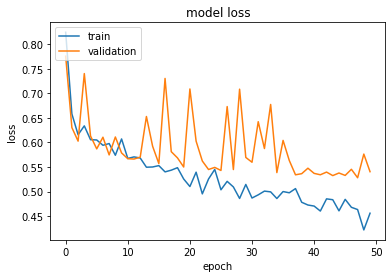

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

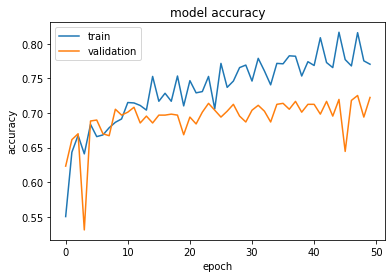

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# Increasing hidden layer

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# Compling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
model_history = model.fit(X_train,y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 1s 85ms/step - loss: 0.6726 - accuracy: 0.5863 - val_loss: 0.6706 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 58ms/step - loss: 0.6583 - accuracy: 0.5978 - val_loss: 0.6572 - val_accuracy: 0.5864
Epoch 3/50
13/13 [==============================] - 1s 58ms/step - loss: 0.6475 - accuracy: 0.6318 - val_loss: 0.6502 - val_accuracy: 0.6062
Epoch 4/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6400 - accuracy: 0.6501 - val_loss: 0.6496 - val_accuracy: 0.5963
Epoch 5/50
13/13 [==============================] - 1s 59ms/step - loss: 0.6342 - accuracy: 0.6470 - val_loss: 0.6327 - val_accuracy: 0.6671
Epoch 6/50
13/13 [==============================] - 1s 58ms/step - loss: 0.6287 - accuracy: 0.6707 - val_loss: 0.6297 - val_accuracy: 0.6615
Epoch 7/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6227 - accuracy: 0.6731 - val_loss: 0.6282 - val_accuracy: 0.6558
Epoch 8/50
13

In [ ]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.7181303116147308 %


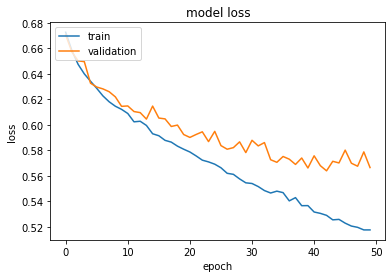

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

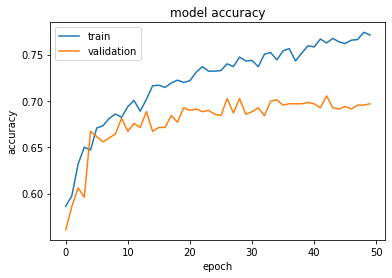

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Changing the optimizers**

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam

In [ ]:
# Defining the adam optimezer and setting the learning rate 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))


# Compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
model_history = model.fit(X_train,y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 1s 77ms/step - loss: 3.0201 - accuracy: 0.4198 - val_loss: 2.8901 - val_accuracy: 0.4391
Epoch 2/50
13/13 [==============================] - 1s 54ms/step - loss: 2.8573 - accuracy: 0.4137 - val_loss: 2.5510 - val_accuracy: 0.4391
Epoch 3/50
13/13 [==============================] - 1s 55ms/step - loss: 2.5049 - accuracy: 0.4137 - val_loss: 2.2159 - val_accuracy: 0.4391
Epoch 4/50
13/13 [==============================] - 1s 57ms/step - loss: 2.1580 - accuracy: 0.4137 - val_loss: 1.8919 - val_accuracy: 0.4391
Epoch 5/50
13/13 [==============================] - 1s 55ms/step - loss: 1.8265 - accuracy: 0.4137 - val_loss: 1.5859 - val_accuracy: 0.4391
Epoch 6/50
13/13 [==============================] - 1s 53ms/step - loss: 1.5218 - accuracy: 0.4137 - val_loss: 1.3078 - val_accuracy: 0.4391
Epoch 7/50
13/13 [==============================] - 1s 54ms/step - loss: 1.2438 - accuracy: 0.4137 - val_loss: 1.0814 - val_accuracy: 0.4391
Epoch 8/50
13

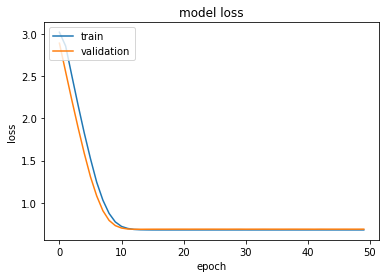

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

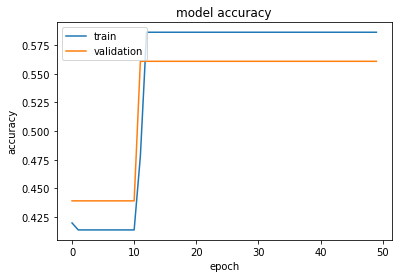

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Setting Up Early Stopping**

In [ ]:
# Importing module for early stopping
from keras.callbacks import EarlyStopping

In [ ]:
# Setting up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

# **Training the model using Early Stopping**

In [ ]:
# Training the model fro 100 epochs

# Defining the early stopping as call back using call back parameter of model fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 1s 72ms/step - loss: 0.6935 - accuracy: 0.5705 - val_loss: 0.6889 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 54ms/step - loss: 0.6782 - accuracy: 0.5863 - val_loss: 0.7014 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6847 - accuracy: 0.5863 - val_loss: 0.6857 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6795 - accuracy: 0.5863 - val_loss: 0.6872 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 1s 54ms/step - loss: 0.6795 - accuracy: 0.5863 - val_loss: 0.6859 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6788 - accuracy: 0.5863 - val_loss: 0.6885 - val_accuracy: 0.5609


# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.5609065155807366 %


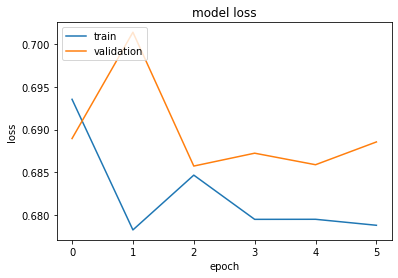

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Hyperparameter tuning for Early Stopping**

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))


# Compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Increase the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [ ]:
# Training the model fro 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 1s 68ms/step - loss: 0.7078 - accuracy: 0.5595 - val_loss: 0.6865 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6808 - accuracy: 0.5863 - val_loss: 0.6935 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 54ms/step - loss: 0.6810 - accuracy: 0.5863 - val_loss: 0.6861 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6794 - accuracy: 0.5863 - val_loss: 0.6909 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6788 - accuracy: 0.5863 - val_loss: 0.6857 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6791 - accuracy: 0.5863 - val_loss: 0.6881 - val_accuracy: 0.5609
Epoch 7/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6785 - accuracy: 0.5863 - val_loss: 0.6876 - val_accuracy: 0.5609
Epoch 

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.5609065155807366 %


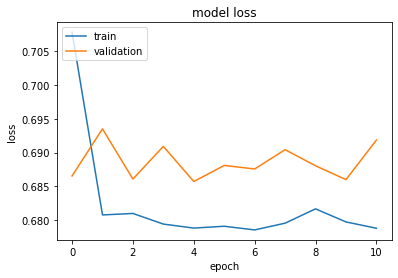

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Using DropOut to Improve model**

# **Define the model Architecture and Adding Dropout layer**

In [ ]:
# Importing Dropout layer
from keras.layers import Dropout

In [ ]:
# Defining the model architecture with dropout layer
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

# **Compile the dropout model**

In [ ]:
# Defining the adam optimezer and setting the learning rate 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the model using Dropout**

In [ ]:
# Training the model fro 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/100
13/13 [==============================] - 1s 75ms/step - loss: 0.7603 - accuracy: 0.5231 - val_loss: 0.6927 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 56ms/step - loss: 0.7466 - accuracy: 0.5170 - val_loss: 0.6752 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 54ms/step - loss: 0.7033 - accuracy: 0.5601 - val_loss: 0.6682 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 56ms/step - loss: 0.7222 - accuracy: 0.5377 - val_loss: 0.6629 - val_accuracy: 0.5652
Epoch 5/100
13/13 [==============================] - 1s 55ms/step - loss: 0.7167 - accuracy: 0.5620 - val_loss: 0.6544 - val_accuracy: 0.6374
Epoch 6/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6962 - accuracy: 0.5741 - val_loss: 0.6488 - val_accuracy: 0.6374
Epoch 7/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6954 - accuracy: 0.5656 - val_loss: 0.6448 - val_accuracy: 0.6459
Epoch 

# **Evaluating Model performance** 

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.7053824362606232 %


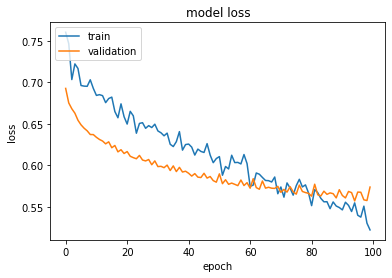

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

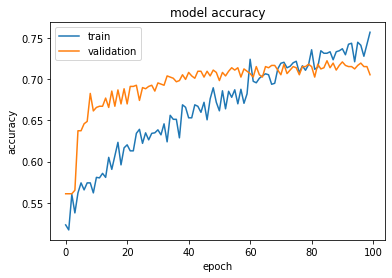

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Using Vanishing/Exploading Gradients**

# **Defining the model Architecture**

In [ ]:
# Defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# **Compile the model**

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam
# Defining the adam optimezer and setting the learning rate 10^-5 and adding clip value to clip the gradients
# Clip is the gradients value
adam = Adam(lr=1e-5, clipvalue=1)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the model**

In [ ]:
# Training the model fro 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/100
13/13 [==============================] - 1s 95ms/step - loss: 0.6970 - accuracy: 0.5450 - val_loss: 0.7020 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 61ms/step - loss: 0.6831 - accuracy: 0.5851 - val_loss: 0.6896 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 60ms/step - loss: 0.6725 - accuracy: 0.5851 - val_loss: 0.6765 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 59ms/step - loss: 0.6653 - accuracy: 0.5851 - val_loss: 0.6665 - val_accuracy: 0.5623
Epoch 5/100
13/13 [==============================] - 1s 64ms/step - loss: 0.6560 - accuracy: 0.6063 - val_loss: 0.6563 - val_accuracy: 0.6190
Epoch 6/100
13/13 [==============================] - 1s 52ms/step - loss: 0.6476 - accuracy: 0.6422 - val_loss: 0.6503 - val_accuracy: 0.6303
Epoch 7/100
13/13 [==============================] - 1s 58ms/step - loss: 0.6408 - accuracy: 0.6634 - val_loss: 0.6429 - val_accuracy: 0.6572
Epoch 

# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.7223796033994334 %


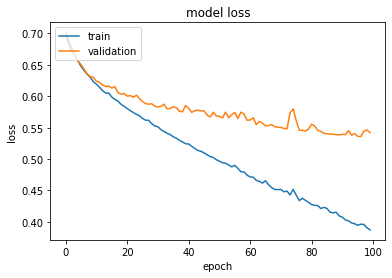

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Setting up Different weight Initialization Technique**

In [ ]:
# Importing Different Initialization technique
from keras.initializers import random_normal, glorot_normal, he_normal

In [ ]:
# Defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed)))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed)))

# **Compiling the model**

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam
# Defining the adam optimezer and setting the learning rate 10^-5
# Clip is the gradients value
adam = Adam(lr=1e-5)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# Training the model fro 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/50
13/13 [==============================] - 1s 86ms/step - loss: 0.6894 - accuracy: 0.5365 - val_loss: 0.6874 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 64ms/step - loss: 0.6817 - accuracy: 0.5863 - val_loss: 0.6848 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 66ms/step - loss: 0.6787 - accuracy: 0.5863 - val_loss: 0.6834 - val_accuracy: 0.5609
Epoch 4/50
13/13 [==============================] - 1s 63ms/step - loss: 0.6767 - accuracy: 0.5863 - val_loss: 0.6817 - val_accuracy: 0.5609
Epoch 5/50
13/13 [==============================] - 1s 58ms/step - loss: 0.6752 - accuracy: 0.5863 - val_loss: 0.6805 - val_accuracy: 0.5609
Epoch 6/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6738 - accuracy: 0.5863 - val_loss: 0.6795 - val_accuracy: 0.5609
Epoch 7/50
13/13 [==============================] - 1s 58ms/step - loss: 0.6724 - accuracy: 0.5863 - val_loss: 0.6781 - val_accuracy: 0.5609
Epoch 8/50
13

# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.6728045325779037 %


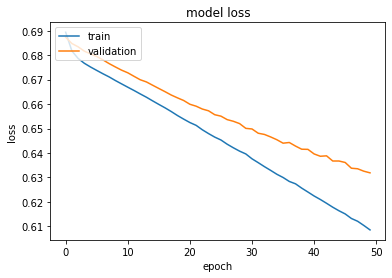

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Weight Initialization using he_normal**

In [ ]:
# Defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))

# **Compiling the model**

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam
# Defining the adam optimezer and setting the learning rate 10^-5
# Clip is the gradients value
adam = Adam(lr=1e-5)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the model**

In [ ]:
# Training the model fro 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/50
13/13 [==============================] - 1s 89ms/step - loss: 0.6949 - accuracy: 0.5693 - val_loss: 0.6710 - val_accuracy: 0.6204
Epoch 2/50
13/13 [==============================] - 1s 67ms/step - loss: 0.6567 - accuracy: 0.6397 - val_loss: 0.6506 - val_accuracy: 0.6147
Epoch 3/50
13/13 [==============================] - 1s 61ms/step - loss: 0.6336 - accuracy: 0.6598 - val_loss: 0.6240 - val_accuracy: 0.6756
Epoch 4/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6175 - accuracy: 0.6762 - val_loss: 0.6139 - val_accuracy: 0.6771
Epoch 5/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6060 - accuracy: 0.6981 - val_loss: 0.6058 - val_accuracy: 0.6799
Epoch 6/50
13/13 [==============================] - 1s 62ms/step - loss: 0.5958 - accuracy: 0.7005 - val_loss: 0.5996 - val_accuracy: 0.6841
Epoch 7/50
13/13 [==============================] - 1s 61ms/step - loss: 0.5865 - accuracy: 0.7108 - val_loss: 0.5919 - val_accuracy: 0.6898
Epoch 8/50
13

# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.7082152974504249 %


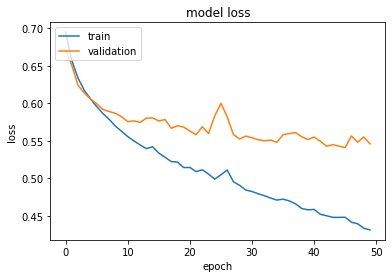

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

#  **Weight Initialization using glorot normal**

In [ ]:
# Defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=glorot_normal(seed=seed)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=glorot_normal(seed=seed)))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=glorot_normal(seed=seed)))

# **Compiling the model**

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam
# Defining the adam optimezer and setting the learning rate 10^-5
# Clip is the gradients value
adam = Adam(lr=1e-5)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the model**

In [ ]:
# Training the model fro 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/50
13/13 [==============================] - 1s 87ms/step - loss: 0.6975 - accuracy: 0.5638 - val_loss: 0.6852 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 65ms/step - loss: 0.6644 - accuracy: 0.6173 - val_loss: 0.6579 - val_accuracy: 0.6232
Epoch 3/50
13/13 [==============================] - 1s 64ms/step - loss: 0.6469 - accuracy: 0.6306 - val_loss: 0.6379 - val_accuracy: 0.6671
Epoch 4/50
13/13 [==============================] - 1s 65ms/step - loss: 0.6344 - accuracy: 0.6604 - val_loss: 0.6274 - val_accuracy: 0.6657
Epoch 5/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6261 - accuracy: 0.6610 - val_loss: 0.6390 - val_accuracy: 0.6374
Epoch 6/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6161 - accuracy: 0.6810 - val_loss: 0.6152 - val_accuracy: 0.6813
Epoch 7/50
13/13 [==============================] - 1s 57ms/step - loss: 0.6088 - accuracy: 0.6871 - val_loss: 0.6080 - val_accuracy: 0.6898
Epoch 8/50
13

# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.6997167138810199 %


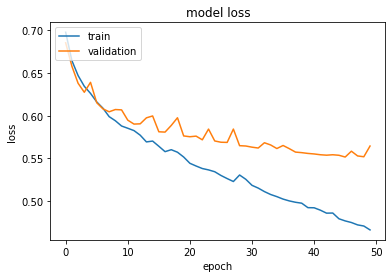

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Using Batch Normalization**

# **Defining the model Architecture**

In [ ]:
# Importing batch normalization layer
from keras.layers import BatchNormalization

In [ ]:
# Defining the model architecture and adding batch normalization layers
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,063,501
Trainable params: 15,063,301
Non-trainable params: 200
_________________________________________________________________


# **Compiling the model**

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam
# Defining the adam optimezer and setting the learning rate 10^-5
# Clip is the gradients value
adam = Adam(lr=1e-5)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the Model**

In [ ]:
# Training the model fro 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/50
13/13 [==============================] - 1s 80ms/step - loss: 0.6516 - accuracy: 0.6555 - val_loss: 0.6840 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 55ms/step - loss: 0.5186 - accuracy: 0.7503 - val_loss: 0.6780 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 55ms/step - loss: 0.4509 - accuracy: 0.8062 - val_loss: 0.6727 - val_accuracy: 0.5609
Epoch 4/50
13/13 [==============================] - 1s 53ms/step - loss: 0.3863 - accuracy: 0.8469 - val_loss: 0.6687 - val_accuracy: 0.5609
Epoch 5/50
13/13 [==============================] - 1s 54ms/step - loss: 0.3466 - accuracy: 0.8742 - val_loss: 0.6649 - val_accuracy: 0.5609
Epoch 6/50
13/13 [==============================] - 1s 54ms/step - loss: 0.3034 - accuracy: 0.9028 - val_loss: 0.6609 - val_accuracy: 0.5609
Epoch 7/50
13/13 [==============================] - 1s 56ms/step - loss: 0.2824 - accuracy: 0.9156 - val_loss: 0.6635 - val_accuracy: 0.5609
Epoch 8/50
13

# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.7379603399433428 %


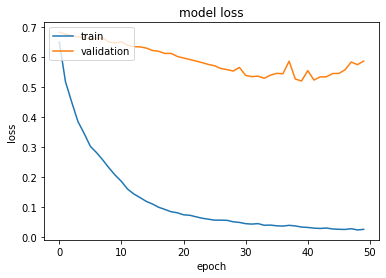

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Setting up model checkpoint**

# **Defining the model architecture**

In [18]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# **Compiling the model**

In [20]:
from keras.optimizers import Adam
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [21]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the model**

In [22]:
# importing model checkpointing from keras callbacks
from keras.callbacks import ModelCheckpoint

In [23]:
# defining model checkpointing

# defining the path to store the weights
filepath="best_weights.hdf5"

# defining the model checkpointing and metric to monitor
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# defining checkpointing variable
callbacks_list = [checkpoint]

In [24]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid), callbacks=callbacks_list)

Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 0.7046 - accuracy: 0.5450
Epoch 00001: val_accuracy improved from -inf to 0.56091, saving model to best_weights.hdf5
13/13 [==============================] - 2s 116ms/step - loss: 0.7046 - accuracy: 0.5450 - val_loss: 0.7045 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - ETA: 0s - loss: 0.6831 - accuracy: 0.5851
Epoch 00002: val_accuracy did not improve from 0.56091
13/13 [==============================] - 1s 53ms/step - loss: 0.6831 - accuracy: 0.5851 - val_loss: 0.6861 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.5851
Epoch 00003: val_accuracy did not improve from 0.56091
13/13 [==============================] - 1s 54ms/step - loss: 0.6711 - accuracy: 0.5851 - val_loss: 0.6721 - val_accuracy: 0.5595
Epoch 4/50
13/13 [==============================] - ETA: 0s - loss: 0.6612 - accuracy: 0.5832
Epoch 00004: val_accuracy improv

#  **Evaluating model performance**

In [31]:
# getting prediction as a form of class as well as probabilities
predictions = model.predict_classes(X_valid)[:,0]
prediction_probabilities = model.predict(X_valid)[:,0]

In [32]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7138810198300283 %


In [33]:
# loading the best model
model.load_weights("best_weights.hdf5")

In [34]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7138810198300283 %


Model is  72 % sure that it is emergency
And actual class is  1


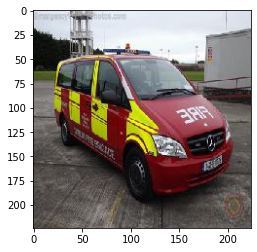

In [51]:
# pull out the original images from the data which corresponds to the validation data
_, valid_vehicles,_,valid_y = train_test_split(data.image_names.values, y, test_size=0.3,random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is ', prob, '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)
